In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from hbn.constants import Defaults
from hbn.visualization import visualize

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

%matplotlib inline

#pio.renderers.default = 'iframe'
import plotly.io as pio
pio.renderers.default='notebook'

#import ipywidgets as widgets       # interactive display
#%config InlineBackend.figure_format = 'svg' # other available formats are: 'retina', 'png', 'jpeg', 'pdf'

In [120]:
# check models
from hbn.models.predictive_modeling import check_models

check_models(filter='*all_feature_models/*')

2023-04-06_11-33-21-21S-57: ['No Diagnosis Given', 'Generalized Anxiety Disorder', 'Social Anxiety (Social Phobia)', 'Specific Phobia', 'Separation Anxiety', 'Other Specified Anxiety Disorder', 'Selective Mutism', 'Panic Disorder', 'Unspecified Anxiety Disorder', 'Agoraphobia']: ['DX_01_Cat_new_binarize']: ['female']
2023-03-22_17-43-23-23S-41: ['No Diagnosis Given', 'Major Depressive Disorder', 'Persistent Depressive Disorder (Dysthymia)', 'Disruptive Mood Dysregulation Disorder', 'Other Specified Depressive Disorder', 'Depressive Disorder Due to Another Medical Condition']: ['DX_01_Cat_new_binarize']: ['female']
2023-03-16_15-03-36-30: ['No Diagnosis Given', 'ADHD-Combined Type', 'ADHD-Inattentive Type', 'Other Specified Attention-Deficit/Hyperactivity Disorder', 'ADHD-Hyperactive/Impulsive Type', 'Unspecified Attention-Deficit/Hyperactivity Disorder']: ['DX_01_Cat_new_binarize']: ['female', 'male']
2023-03-19_15-30-25-25S-53: ['ADHD-Combined Type', 'ADHD-Inattentive Type', 'No Diagn

In [121]:

# # 2023 models
# models_dict = {
#              'Anxiety': 'all_feature_models/2023-03-09_14-35-10-10S-77', 
#               'Depression': 'all_feature_models/2023-03-09_14-35-15-15S-12', 
#               'ADHD': 'all_feature_models/2023-03-09_14-31-02-61',
#               'ASD': 'all_feature_models/2023-03-09_14-35-06-06S-61',
#               'Learning-Disorder-Reading-Impairment': 'all_feature_models/2023-03-09_14-35-19-19S-5',
#               'ASD-females': 'all_feature_models/2023-03-09_14-35-37-37S-20',
#               'ASD-males': 'all_feature_models/2023-03-09_14-35-31-31S-25',
#               'ADHD-females': 'all_feature_models/2023-03-09_14-35-27-27S-21',
#               'ADHD-males': 'all_feature_models/2023-03-09_14-35-23-23S-59'
#              }

models_dict = { 'ADHD-incl-comorbidities': 'all_feature_models/2023-03-16_15-03-36-30', # incl comobordities
                'ADHD': 'all_feature_models/2023-03-17_16-20-51-94',
                'ADHD-females': 'all_feature_models/2023-03-19_15-30-41-41S-99',
                'ADHD-males': 'all_feature_models/2023-03-19_15-30-25-25S-53',
               'ADHD-fullmodel': 'all_feature_models/2023-04-01_18-18-41-72',
               'ADHD-fullmodel-males': 'all_feature_models/2023-04-05_17-24-04-04S-8',
               'ADHD-fullmodel-females': 'all_feature_models/2023-04-06_11-33-22-22S-60',
               'ASD': 'all_feature_models/2023-03-21_17-42-28-28S-61',
               'ASD-females': 'all_feature_models/2023-03-19_15-31-26-26S-7',
               'ASD-males': 'all_feature_models/2023-03-22_16-13-13-13S-76',
               'ASD-fullmodel': 'all_feature_models/2023-04-03_10-31-05-05S-20',
               'ASD-fullmodel-females': 'all_feature_models/2023-04-05_08-38-54-54S-26',
               'ASD-fullmodel-males': 'all_feature_models/2023-04-05_08-38-53-53S-82',
               'Depression': 'all_feature_models/2023-03-19_15-30-01-01S-5', 
               'Depression-females': 'all_feature_models/2023-03-22_17-43-23-23S-41',
               'Depression-males': 'all_feature_models/2023-03-22_17-43-23-23S-13',
               'Depression-fullmodel': 'all_feature_models/2023-04-05_08-38-55-55S-54',
               'Depression-fullmodel-females': 'all_feature_models/2023-04-05_08-38-54-54S-42',
               'Depression-fullmodel-males': 'all_feature_models/2023-04-06_11-33-19-19S-98',
               'Anxiety-females': 'all_feature_models/2023-03-22_17-43-19-19S-66',
               'Anxiety-males': 'all_feature_models/2023-03-22_17-43-14-14S-30',
               'Anxiety-fullmodel': 'all_feature_models/2023-04-05_17-22-04-04S-21',
               'Anxiety-fullmodel-males':'all_feature_models/2023-04-05_17-26-05-05S-96',
               'Anxiety-fullmodel-females': 'all_feature_models/2023-04-06_11-33-21-21S-57',
               'Reading Impairment': 'all_feature_models/2023-03-19_15-45-21-21S-72',
               'Reading Impairment-females': 'all_feature_models/2023-03-22_17-43-10-10S-35',
               'Reading Impairment-males': 'all_feature_models/2023-03-19_15-31-26-26S-7',
               'Reading Impairment-fullmodel': 'all_feature_models/2023-04-05_17-24-04-04S-97',
               'Reading Impairment-fullmodel-females': 'all_feature_models/2023-04-05_17-24-04-04S-11',
               'Reading Impairment-fullmodel-males': 'all_feature_models/2023-04-05_17-24-04-04S-31',
              }

# loop over models
df_all = pd.DataFrame()
df_features = pd.DataFrame()
for key, value in models_dict.items():
    MODEL_DIR = os.path.join(Defaults.MODEL_DIR, value)

    df_classify = pd.read_csv(os.path.join(MODEL_DIR, 'classifier-all-phenotypic-models-performance.csv'))
    df_classify['data'] = df_classify['data'].map({'model-data': 'null', 'model-null': 'data'})
    df_classify['participant_group'] = key
    
    try:
        df_feature = pd.read_csv(os.path.join(MODEL_DIR, 'classifier-feature_importance.csv'))
        df_feature['participant_group'] = key
        df_features = pd.concat([df_features, df_feature])
    except:
        pass
    
    df_all = pd.concat([df_all, df_classify])

In [5]:
# set plotting style
visualize.plotting_style()

## Models are trained to classify diagnoses across 5 major disorders: ADHD, ASD, Anxiety, Depression, and Reading Impairment

* Each figure describes a model (Decision Tree Classifier) trained on either all assessments OR one assessment (e.g., Parent, Child, Teacher) across multiple domains (e.g., Language Tasks, Cognitive Testing)
* Models (x axis) show ROC AUC results


### Exceptions:
* Demographics are included in these models: race and ethnicity, sex, age, diagnosis subtype and comorbidities are NOT INCLUDED
* Only numeric variables are included (no categorical variables)
* SMOTE (minor class upsampling) is applied to models

## Full feature models (Child + Teacher + Parent)

In [72]:
#df = df_all[df_all['assessment']=='all']

to_keep = ['ADHD-fullmodel', 'Depression-fullmodel', 'Anxiety-fullmodel', 'Reading Impairment-fullmodel', 'ASD-fullmodel']

df1 = df_all[(df_all['participant_group'].isin(to_keep)) & 
             (df_all['target']=='DX_01_Cat_new_binarize')]
df1['participant_group'] = df1['participant_group'].str.replace("-fullmodel","")

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')


## Full feature models (Child + Teacher + Parent) - Males/Females

In [73]:
df1 = df_all[df_all['participant_group'].str.contains('-fullmodel-females|-fullmodel-males') & 
      (df_all['target']=='DX_01_Cat_new_binarize')]
df1['participant_group'] = df1['participant_group'].str.replace("-fullmodel","")

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')

## ADHD - difference between including comobidities in a basic demographic model versus excluding it from model
### demographic variables are race, ethnicity, age

In [22]:
df = df_all[df_all['measures']=='Demographics']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')

## All features - ADHD - Parent vs. Child vs. Teacher


In [85]:
df = df_all[df_all['participant_group'].isin(['ADHD'])]
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]
df1['new_col'] = df1['new_col'].map({'Child Measures-all': 'Child',
                                                        'Parent Measures-Basic_Demos': 'Demographics',
                                                        'Parent Measures-all': 'Parent',
                                                        'Teacher Measures-all': 'Teacher',
                                                        'all-all': 'Full Model'})

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - ADHD (females) - Parent vs. Child vs. Teacher

In [24]:
df = df_all[df_all['participant_group']=='ADHD-females']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - ADHD (males) - Parent vs. Child vs. Teacher

In [25]:
df = df_all[df_all['participant_group']=='ADHD-males']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - ASD - Parent vs. Child vs. Teacher

In [26]:
df = df_all[df_all['participant_group']=='ASD']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - ASD (females) - Parent vs. Child vs. Teacher

In [27]:
df = df_all[df_all['participant_group']=='ASD-females']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - ASD (females) - Parent vs. Child vs. Teacher

In [28]:
df = df_all[df_all['participant_group']=='ASD-males']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - Depression - Parent vs. Child vs. Teacher

In [29]:
df = df_all[df_all['participant_group']=='Depression']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## All features - Reading Impairment - Parent vs. Child vs. Teacher

In [30]:
df = df_all[df_all['participant_group']=='Reading Impairment']
df['new_col'] = df['assessment'] + '-' + df['abbrevs']

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='new_col', y='roc_auc_score', title='')

## Parent features - compare across diagnoses

In [31]:
df = df_all[(df_all['assessment']=='Parent Measures') & (df_all['abbrevs']=='all')]

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')

## Child features - compare across diagnoses

In [32]:
df = df_all[(df_all['assessment']=='Child Measures') & (df_all['abbrevs']=='all')]

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')

## Teacher features - compare across diagnoses

In [33]:
df = df_all[(df_all['assessment']=='Teacher Measures') & (df_all['abbrevs']=='all')]

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')

## Basic Demos features - compare across diagnoses

In [34]:
df = df_all[(df_all['assessment']=='Parent Measures') & (df_all['abbrevs']!='all')]

df1 = df[(df['target']=='DX_01_Cat_new_binarize')]

visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')

## Models are trained to classify diagnoses across 5 major disorders: ADHD, ASD, Anxiety, Depression, and Reading Impairment

* Each figure describes a model (Decision Tree Classifier) trained on individual measures (e.g., CELF, EEG etc) across multiple domains (e.g., Language Tasks, Cognitive Testing)
* Models (x axis) show ROC AUC results


### Exceptions:
* Demographics are included in these models: race and ethnicity, sex, age, diagnosis subtype and comorbidities are NOT INCLUDED
* Only numeric variables are included (no categorical variables)
* SMOTE (minor class upsampling) is applied to models

In [35]:
# check models
from hbn.models.predictive_modeling import check_models

check_models(filter='*all_demos_SMOTE/*')
#check_models(filter='*all_demos_CORRECT/*')

2023-03-26_19-05-08-29: ['No Diagnosis Given', 'ADHD-Combined Type', 'ADHD-Inattentive Type', 'Other Specified Attention-Deficit/Hyperactivity Disorder', 'ADHD-Hyperactive/Impulsive Type', 'Unspecified Attention-Deficit/Hyperactivity Disorder']: ['DX_01_Cat_new_binarize']: ['female', 'male']
2023-03-26_19-07-42-42S-9: ['ADHD-Combined Type', 'ADHD-Inattentive Type', 'No Diagnosis Given', 'Other Specified Attention-Deficit/Hyperactivity Disorder', 'ADHD-Hyperactive/Impulsive Type', 'Unspecified Attention-Deficit/Hyperactivity Disorder']: ['DX_01_Cat_new_binarize']: ['male']
2023-03-26_19-09-52-52S-21: ['No Diagnosis Given', 'Other Specified Anxiety Disorder', 'Generalized Anxiety Disorder', 'Separation Anxiety', 'Social Anxiety (Social Phobia)', 'Specific Phobia', 'Unspecified Anxiety Disorder', 'Agoraphobia']: ['DX_01_Cat_new_binarize']: ['male']
2023-03-26_19-09-17-17S-24: ['No Diagnosis Given', 'Specific Learning Disorder with Impairment in Reading']: ['DX_01_Cat_new_binarize']: ['mal

## Compare model with/without SMOTE (upsampling minority class)

SMOTE always does better

In [36]:
models_dict = {
                'ADHD-noSMOTE': 'all_demos_CORRECT/2023-03-07_18-43-26-43',
                'ADHD': 'all_demos_SMOTE/2023-03-26_19-05-08-29',
              }

# loop over models
df_all = pd.DataFrame()
for key, value in models_dict.items():
    MODEL_DIR = os.path.join(Defaults.MODEL_DIR, value)

    df_classify = pd.read_csv(os.path.join(MODEL_DIR, 'classifier-all-phenotypic-models-performance.csv'))
    df_classify['data'] = df_classify['data'].map({'model-data': 'null', 'model-null': 'data'})
    df_classify['participant_group'] = key
    
    df_all = pd.concat([df_all, df_classify])

df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']=='Parent Measures')]


visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title='')


In [90]:
models_dict = {
                'ADHD': 'all_demos_SMOTE/2023-03-26_19-05-08-29',
               'ASD': 'all_demos_SMOTE/2023-03-26_19-06-18-18S-70',
               'Depression': 'all_demos_SMOTE/2023-03-26_19-06-38-38S-26', 
               'Reading Impairment': 'all_demos_SMOTE/2023-03-26_19-07-27-27S-72',
                'ASD-females': 'all_demos_SMOTE/2023-03-26_19-08-53-53S-20',
                'ASD-males': 'all_demos_SMOTE/2023-03-26_19-08-18-18S-6',
                'ADHD-females': 'all_demos_SMOTE/2023-03-26_19-07-47-47S-5',
                'ADHD-males': 'all_demos_SMOTE/2023-03-26_19-07-42-42S-9',
               'Depression-females': 'all_demos_SMOTE/2023-03-26_19-10-13-13S-35',
               'Depression-males': 'all_demos_SMOTE/2023-03-26_19-10-54-54S-20',
               'Anxiety-females': 'all_demos_SMOTE/2023-03-26_19-09-49-49S-93',
               'Anxiety-males': 'all_demos_SMOTE/2023-03-26_19-09-52-52S-21',
               'Reading Impairment-females': 'all_demos_SMOTE/2023-03-26_19-09-21-21S-45',
               'Reading Impairment-males': 'all_demos_SMOTE/2023-03-26_19-09-17-17S-24' 
              }

# loop over models
df_all = pd.DataFrame()
for key, value in models_dict.items():
    MODEL_DIR = os.path.join(Defaults.MODEL_DIR, value)

    df_classify = pd.read_csv(os.path.join(MODEL_DIR, 'classifier-all-phenotypic-models-performance.csv'))
    df_classify['data'] = df_classify['data'].map({'model-data': 'null', 'model-null': 'data'})
    df_classify['participant_group'] = key
    
    df_all = pd.concat([df_all, df_classify])

## Child Measures - Language Tasks

In [38]:
df_all['assessment'].unique()

array(['Child Measures', 'Clinical Measures', 'Parent Measures',
       'Teacher Measures'], dtype=object)

In [39]:
domain = 'Language_Tasks'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']=='Child Measures')]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']=='Child Measures') & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)

## Child Measures - Cognitive Testing

In [40]:
domain = 'Cognitive_Testing'

abbrevs = df_all[df_all['domains']==domain]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']=='Child Measures') & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Interview_of_Emotional_and_Psychological_Function

In [41]:
domain = 'Interview_of_Emotional_and_Psychological_Function'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Interview_of_Emotional_and_Psychological_Function

In [42]:
domain = 'Interview_of_Emotional_and_Psychological_Function'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Medical_Status_Measures

In [43]:
domain = 'Medical_Status_Measures'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Physical_Fitness_and_Status

In [44]:
domain = 'Physical_Fitness_and_Status'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Questionnaire_Measures_of_Emotional_and_Cognitive_Status

In [45]:
domain = 'Questionnaire_Measures_of_Emotional_and_Cognitive_Status'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Questionnaire_Measures_of_Family_Structure_Stress_and_Trauma

In [46]:
domain = 'Questionnaire_Measures_of_Family_Structure_Stress_and_Trauma'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Physiology/Motor/Neurology

In [47]:
assessment = 'Child Measures'

cols = ['Neurologic_Function', 'Physiologic_Function', 'Vision', 'Motor_Skills']

abbrevs = df_all[(df_all['domains'].isin(cols)) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Child Measures - Questionnaire_Measures_of_Substance_Use_&_Addiction

In [48]:
domain = 'Questionnaire_Measures_of_Substance_Use_&_Addiction'
assessment = 'Child Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Parent Measures - Demographic_Questionnaire_Measures

In [49]:
domain = 'Demographic_Questionnaire_Measures'
assessment = 'Parent Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Parent Measures - Interview_of_Emotional_and_Psychological_Function

In [50]:
domain = 'Interview_of_Emotional_and_Psychological_Function'
assessment = 'Parent Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Parent Measures - Questionnaire_Measures_of_Family_structure_Stress_and_Trauma

In [51]:
domain = 'Questionnaire_Measures_of_Family_structure_Stress_and_Trauma'
assessment = 'Parent Measures'

abbrevs = df_all[(df_all['domains']==domain) & (df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['domains']==domain) &
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


In [52]:
assessment = 'Teacher Measures'

abbrevs = df_all[(df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['abbrevs']==abbrev)]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## Children's global assessment scale

In [53]:

assessment = 'Clinical Measures'

abbrevs = df_all[(df_all['assessment']==assessment)]['abbrevs'].unique()

for abbrev in abbrevs:
    
    df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                      (df_all['assessment']==assessment) & 
                      (df_all['abbrevs']=='CGAS')]


    visualize.predictive_modeling_group(df=df1, x='participant_group', y='roc_auc_score', title=abbrev)


## All measures - ADHD

In [102]:
df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
            (df_all['participant_group']=='ADHD')]


visualize.predictive_modeling_group(df=df1, x='abbrevs', y='roc_auc_score', title='All measures - ADHD')


In [101]:
to_keep = ['CBCL', 'C3SR',  'SWAN', 'SympChck', 'SDQ']


df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
            (df_all['participant_group']=='ADHD') &
            (df_all['abbrevs'].isin(to_keep))]


visualize.predictive_modeling_group(df=df1, x='abbrevs', y='roc_auc_score', title='All measures - ADHD')


In [109]:
to_keep = ['CBCL', 'TRF', 'YSR']


df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
            (df_all['participant_group']=='ADHD') &
            (df_all['abbrevs'].isin(to_keep))]


visualize.predictive_modeling_group(df=df1, x='abbrevs', y='roc_auc_score', title='All measures - ADHD')


## Which measures predict females better than males (and vice versa)?

these graphs demonstrate which measures are better predicted in females than males. overall takeaway is that more measures better predict males than females (91% of measures classify males better)

In [55]:
# filter dataframe and groupby abbrevs and participant group (ADHD-females and ADHD-males)
df_grouped = df_all[(df_all['participant_group'].isin(['ADHD-females', 'ADHD-males'])) &
       (df_all['target']=='DX_01_Cat_new_binarize') &
       (df_all['data']=='data')].groupby(['abbrevs', 'participant_group']).mean().reset_index()

# get scores for males and females
df_grouped['male_scores'] = df_grouped.loc[df_grouped['participant_group']=='ADHD-males', 'roc_auc_score']
df_grouped['female_scores'] = df_grouped.loc[df_grouped['participant_group']=='ADHD-females', 'roc_auc_score']

# groupby abbreviations
df_new = df_grouped.groupby('abbrevs').mean()

# calculate difference score between male and female scores
df_new['diff_score'] = df_new['male_scores'] - df_new['female_scores']

# decide which scores are male or female
df_new.loc[df_new['diff_score']>0, 'males'] = True
df_new.loc[df_new['diff_score']<0, 'males'] = False

df_new = df_new.reset_index()

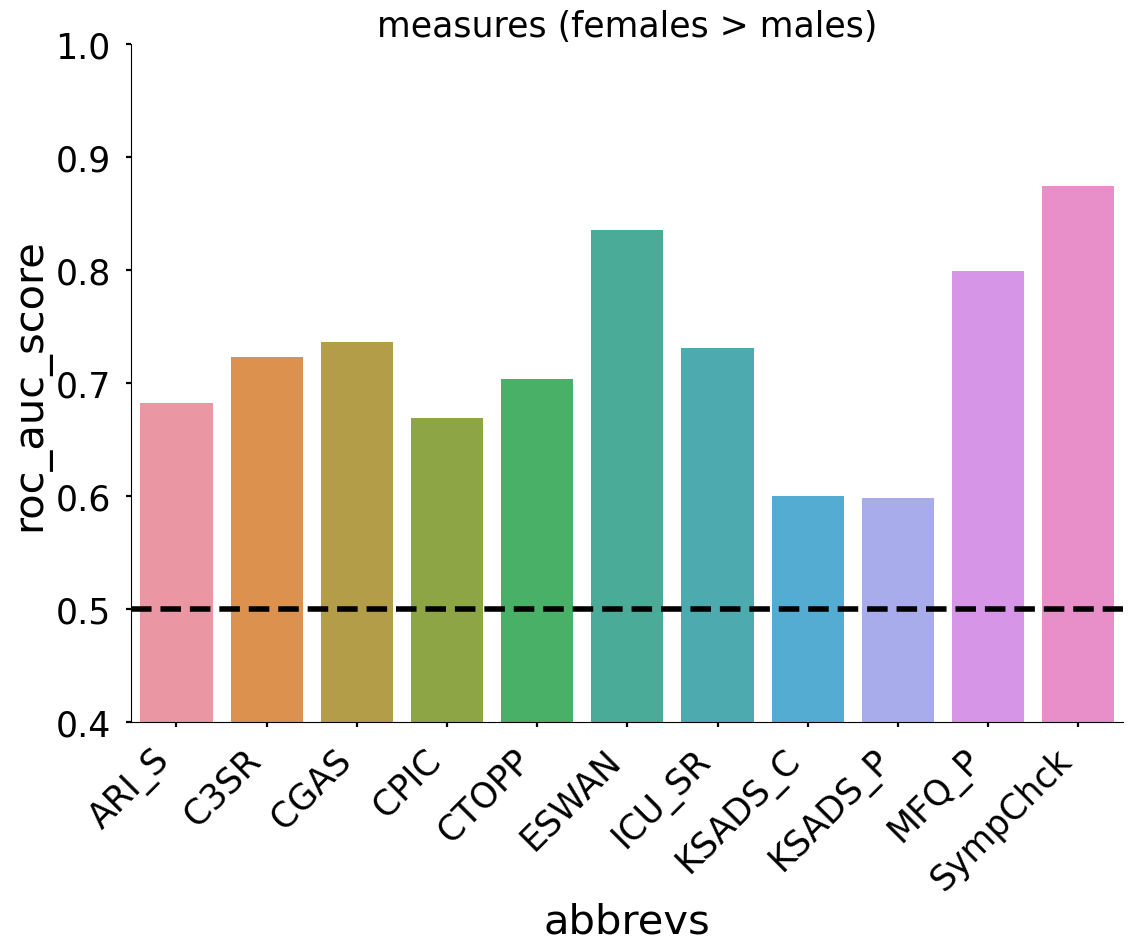

In [56]:
df1 = df_new[(df_new['males']==False)]

sns.barplot(data=df1, x='abbrevs', y='roc_auc_score')
plt.xticks(rotation=45, ha='right');
plt.ylim([.4,1])
plt.axhline(y=.5, color = 'k', linestyle = '--')
plt.title('measures (females > males)');

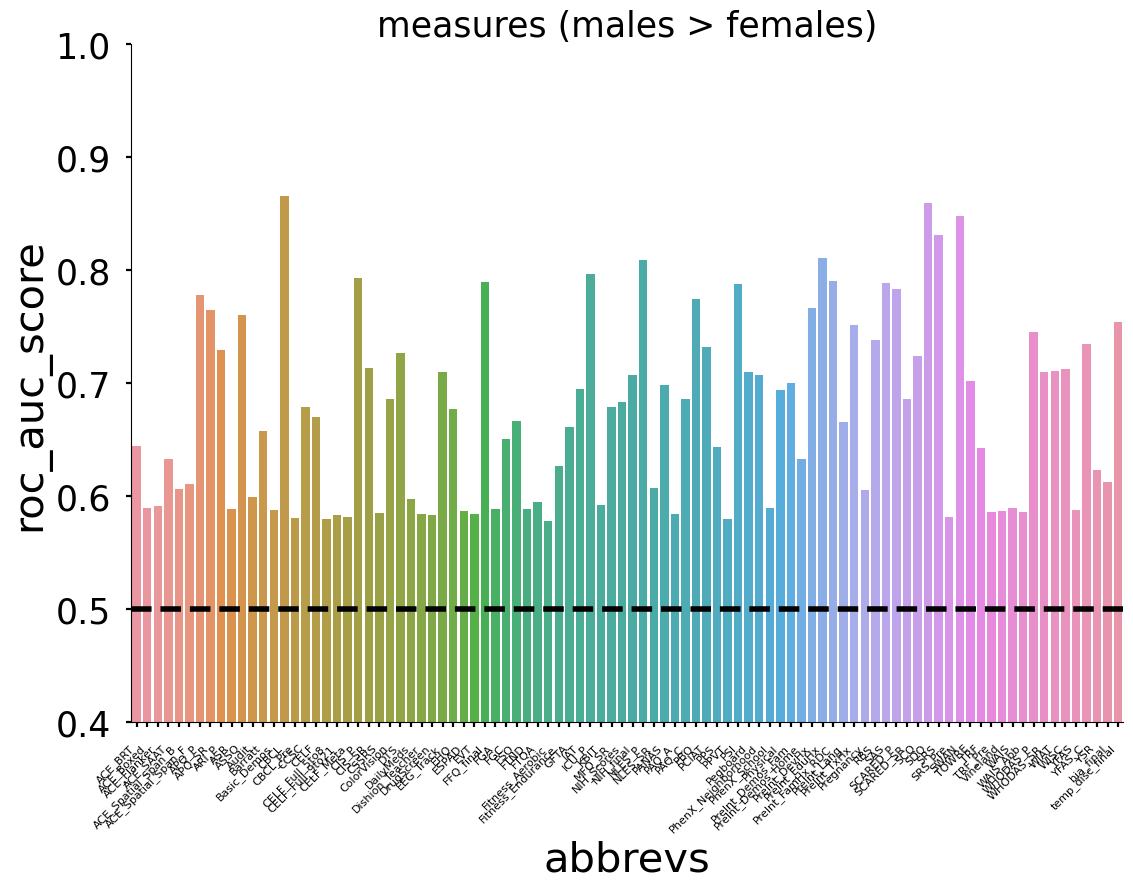

In [57]:
df1 = df_new[(df_new['males']==True)]

sns.barplot(data=df1, x='abbrevs', y='roc_auc_score')
plt.xticks(fontsize=8, rotation=45, ha='right');
plt.ylim([.4,1])
plt.axhline(y=.5, color = 'k', linestyle = '--')
plt.title('measures (males > females)');

## All measures - Depression

In [58]:

df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                  (df_all['participant_group']=='Depression')]


visualize.predictive_modeling_group(df=df1, x='abbrevs', y='roc_auc_score', title='All measures - Depression')


## ASD

In [59]:

df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                  (df_all['participant_group']=='ASD')]


visualize.predictive_modeling_group(df=df1, x='abbrevs', y='roc_auc_score', title='All measures - ASD')


## Reading Impairment

In [60]:
df1 = df_all[(df_all['target']=='DX_01_Cat_new_binarize') & 
                  (df_all['participant_group']=='Reading Impairment')]


visualize.predictive_modeling_group(df=df1, x='abbrevs', y='roc_auc_score', title='All measures - Reading Impairment')
